In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import set_matplotlib_hangul

Hangul OK in your Windows!!


# EDA 및 시각화

In [167]:
data = pd.read_csv('../data/신용카드/train.csv')
del data['index']
data.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


```
1. gender: 성별

2. car: 차량 소유 여부

3. reality: 부동산 소유 여부

4. child_num: 자녀 수

5. income_total: 연간 소득

6. income_type: 소득 분류
['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']

7. edu_type: 교육 수준
['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']


8. family_type: 결혼 여부
['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']

9. house_type: 생활 방식
['Municipal apartment', 'House / apartment', 'With parents','Co-op apartment', 'Rented apartment', 'Office apartment']

10. DAYS_BIRTH: 출생일
데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

11. DAYS_EMPLOYED: 업무 시작일
데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미
양수 값은 고용되지 않은 상태를 의미함

12. FLAG_MOBIL: 핸드폰 소유 여부

13. work_phone: 업무용 전화 소유 여부

14. phone: 전화 소유 여부

15. email: 이메일 소유 여부

16. occyp_type: 직업 유형

17. family_size: 가족 규모

18. begin_month: 신용카드 발급 월
데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미

19. credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
낮을 수록 높은 신용의 신용카드 사용자를 의미함
```


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  FLAG_MOBIL     26457 non-null  int64  
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  occyp_type     18286 non-null  object 
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
 18  credit

### 1. DAYS_BIRTH 변수를 나이 변수로 바꾸기

In [168]:
data['age'] = abs(data['DAYS_BIRTH']) // 365
data['age'].value_counts()[:5]

37    903
27    836
40    820
28    809
34    796
Name: age, dtype: int64

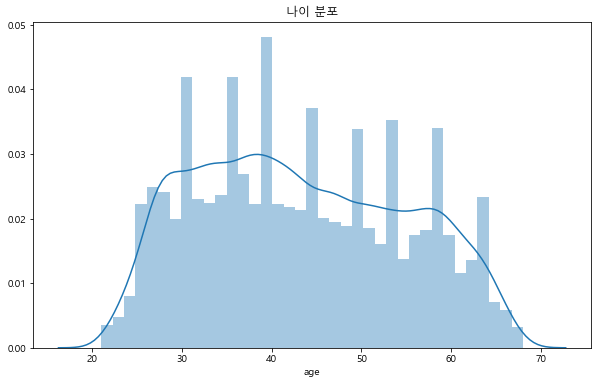

In [169]:
plt.figure(figsize = (10,6))
sns.distplot(data.age)
plt.title('나이 분포')
plt.show()

### 2. occyp_type과 credit class 독립성 판단 (카이제곱 검정)
- 이 변수가 결측치도 있고 까다로운 변수라고 생각이 든다.
- 만약 독립이라면 제거 하고 진행할 예정

In [170]:
# 전체 비율 확인
data.occyp_type.value_counts() / sum(data.occyp_type.value_counts())

Laborers                 0.246746
Core staff               0.144701
Sales staff              0.138849
Managers                 0.118506
Drivers                  0.086131
High skill tech staff    0.056874
Accountants              0.049327
Medicine staff           0.047249
Cooking staff            0.024992
Security staff           0.023187
Cleaning staff           0.022039
Private service staff    0.013289
Low-skill Laborers       0.006945
Waiters/barmen staff     0.006781
Secretaries              0.005305
Realty agents            0.003445
HR staff                 0.003391
IT staff                 0.002242
Name: occyp_type, dtype: float64

- 검정을 위한 새 변수 설정

- 상위 9개정도만 묶고, 나머지는 기타로 분류

In [171]:
occyp_list = (data.occyp_type.value_counts() / sum(data.occyp_type.value_counts())).index[:9]
occyp_list

Index(['Laborers', 'Core staff', 'Sales staff', 'Managers', 'Drivers',
       'High skill tech staff', 'Accountants', 'Medicine staff',
       'Cooking staff'],
      dtype='object')

In [172]:
occyp_type_new = ['etc.' if row['occyp_type'] not in occyp_list else row['occyp_type'] for idx,row in data.iterrows()]
data['occyp_type_new'] = occyp_type_new
data['occyp_type_new'].value_counts()

etc.                     9755
Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Name: occyp_type_new, dtype: int64

- 기타가 너무 많아진것 같기도..?
- 일단 pass

#### 각 신용도별 직업의 비율 확인

- 신용도 : 0

In [173]:
credit0 = data[data['credit'] == 0].occyp_type_new.value_counts() #/ sum(data[data['credit'] == 0].occyp_type_new.value_counts()) 
credit0

etc.                     1147
Laborers                  586
Core staff                347
Sales staff               293
Managers                  280
Drivers                   187
High skill tech staff     123
Accountants               118
Medicine staff             83
Cooking staff              58
Name: occyp_type_new, dtype: int64

- 신용도 : 1

In [174]:
credit1 = data[data['credit'] == 1].occyp_type_new.value_counts() #/ sum(data[data['credit'] == 1].occyp_type_new.value_counts()) 
credit1

etc.                     2299
Laborers                 1082
Sales staff               650
Core staff                622
Managers                  458
Drivers                   358
High skill tech staff     270
Accountants               227
Medicine staff            191
Cooking staff             110
Name: occyp_type_new, dtype: int64

- 신용도 : 2

In [175]:
credit2 = data[data['credit'] == 2].occyp_type_new.value_counts() #/ sum(data[data['credit'] == 2].occyp_type_new.value_counts()) 
credit2

etc.                     6309
Laborers                 2844
Core staff               1677
Sales staff              1596
Managers                 1429
Drivers                  1030
High skill tech staff     647
Medicine staff            590
Accountants               557
Cooking staff             289
Name: occyp_type_new, dtype: int64

##### 우선 육안으로 확인했을때는, 비율이 비슷비슷해 보인다

In [176]:
cross_tab1 = pd.concat([credit0, credit1, credit2], axis = 1)
cross_tab1.columns = ['credit0', 'credit1', 'credit2']
cross_tab1 = cross_tab1.transpose()
cross_tab1

,etc.,Laborers,Core staff,Sales staff,Managers,Drivers,High skill tech staff,Accountants,Medicine staff,Cooking staff
credit0,1147,586,347,293,280,187,123,118,83,58
credit1,2299,1082,622,650,458,358,270,227,191,110
credit2,6309,2844,1677,1596,1429,1030,647,557,590,289


In [177]:
from scipy.stats import chi2_contingency

results = chi2_contingency(cross_tab1)
print('Chi squares(X) : {}'.format(results[0]))
print('p-value : {}'.format(results[1]))

Chi squares(X) : 35.445610984781666
p-value : 0.008303015870383776


- 통계적 유의성으로만 따졌을때, 신용도와 직업은 독립이라고 말하기 어려움
- 허나, 범주가 너무 많아서 실용적 유의성도 함께 보면 좋을것 같다고 생각

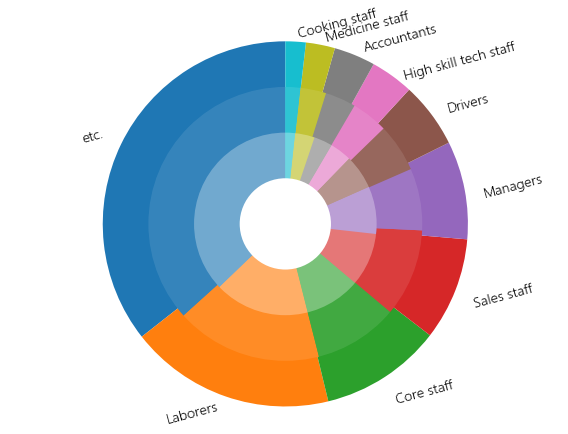

In [178]:
plt.figure(figsize = (8,6))


textprops = dict(rotation=15,size=14, weight=3)

##################### 신용도 = 0 ########################
plt.pie(cross_tab1.iloc[0,:],
        explode = (0,0,0,0,0,0,0,0,0,0), startangle = 90, 
        radius = 1, labels = cross_tab1.columns,
        textprops = textprops)

centre_circle = plt.Circle((0,0),0.75, fc='white', alpha = 0.1)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

##################### 신용도 = 1 ########################
plt.pie(cross_tab1.iloc[1,:],
        explode = (0,0,0,0,0,0,0,0,0,0), startangle = 90, 
        radius = 0.75)

centre_circle = plt.Circle((0,0),0.5, fc='white', alpha = 0.3)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

##################### 신용도 = 2 ########################
plt.pie(cross_tab1.iloc[2,:],
        explode = (0,0,0,0,0,0,0,0,0,0), startangle = 90, 
        radius = 0.5)

centre_circle = plt.Circle((0,0),0.25, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()
plt.show()

- 겉에서 부터 한 겹씩 신용도 0, 1, 2의 직업 비율을 나타낸 파이차트

- **위의 파이차트를 보고도 직업과 신용도는 독립이아니라고 말할 수 있을까?**

- 물론 직업과 연령, 직업과 거주지 등등 여러 교호작용항을 무시할 수 없겠으나, 우선은 제거 하는 방향으로 가는게 좋다고 생각

### 3-0 데이터 변수들 정리
- 1. 테스트용으로 만들었던 변수들은 제거하고
- 2. DAYS_EMPLOYED, begin_month 등의 변수는 음수에서 양수로 바꿔주고

In [179]:
data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'] * -1
data['begin_month'] = data['begin_month'] * -1

In [180]:
data = data.drop(['occyp_type','DAYS_BIRTH'], axis = 1)

- FLAG_MOBIL 변수는 모든데이터가 1 이므로 제거해도 좋음

In [181]:
data.FLAG_MOBIL.value_counts()

1    26457
Name: FLAG_MOBIL, dtype: int64

In [182]:
data = data.drop(['FLAG_MOBIL'], axis = 1)

- DAYS_EMPLOYED 변수가 양수(고용 안됨) 그냥 -1로 처리

In [184]:
data.loc[data['DAYS_EMPLOYED'] < 0,'DAYS_EMPLOYED'] = -1

### 3. 각 변수별 분포를 확인

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          26457 non-null  object 
 1   car             26457 non-null  object 
 2   reality         26457 non-null  object 
 3   child_num       26457 non-null  int64  
 4   income_total    26457 non-null  float64
 5   income_type     26457 non-null  object 
 6   edu_type        26457 non-null  object 
 7   family_type     26457 non-null  object 
 8   house_type      26457 non-null  object 
 9   DAYS_EMPLOYED   26457 non-null  int64  
 10  work_phone      26457 non-null  int64  
 11  phone           26457 non-null  int64  
 12  email           26457 non-null  int64  
 13  family_size     26457 non-null  float64
 14  begin_month     26457 non-null  float64
 15  credit          26457 non-null  float64
 16  age             26457 non-null  int64  
 17  occyp_type_new  26457 non-null 

In [36]:
data.shape[1]

21

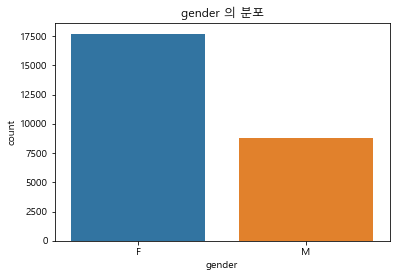

In [56]:
sns.countplot(data.iloc[:,0])
plt.title(f'{data.iloc[:,0].name} 의 분포')
plt.show()

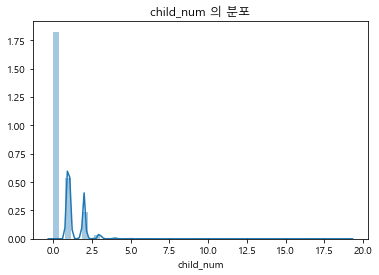

In [62]:
sns.distplot(data.iloc[:,3])
plt.title(f'{data.iloc[:,3].name} 의 분포')
plt.show()

In [120]:
str(data.iloc[:,11][0]).isdigit()

True

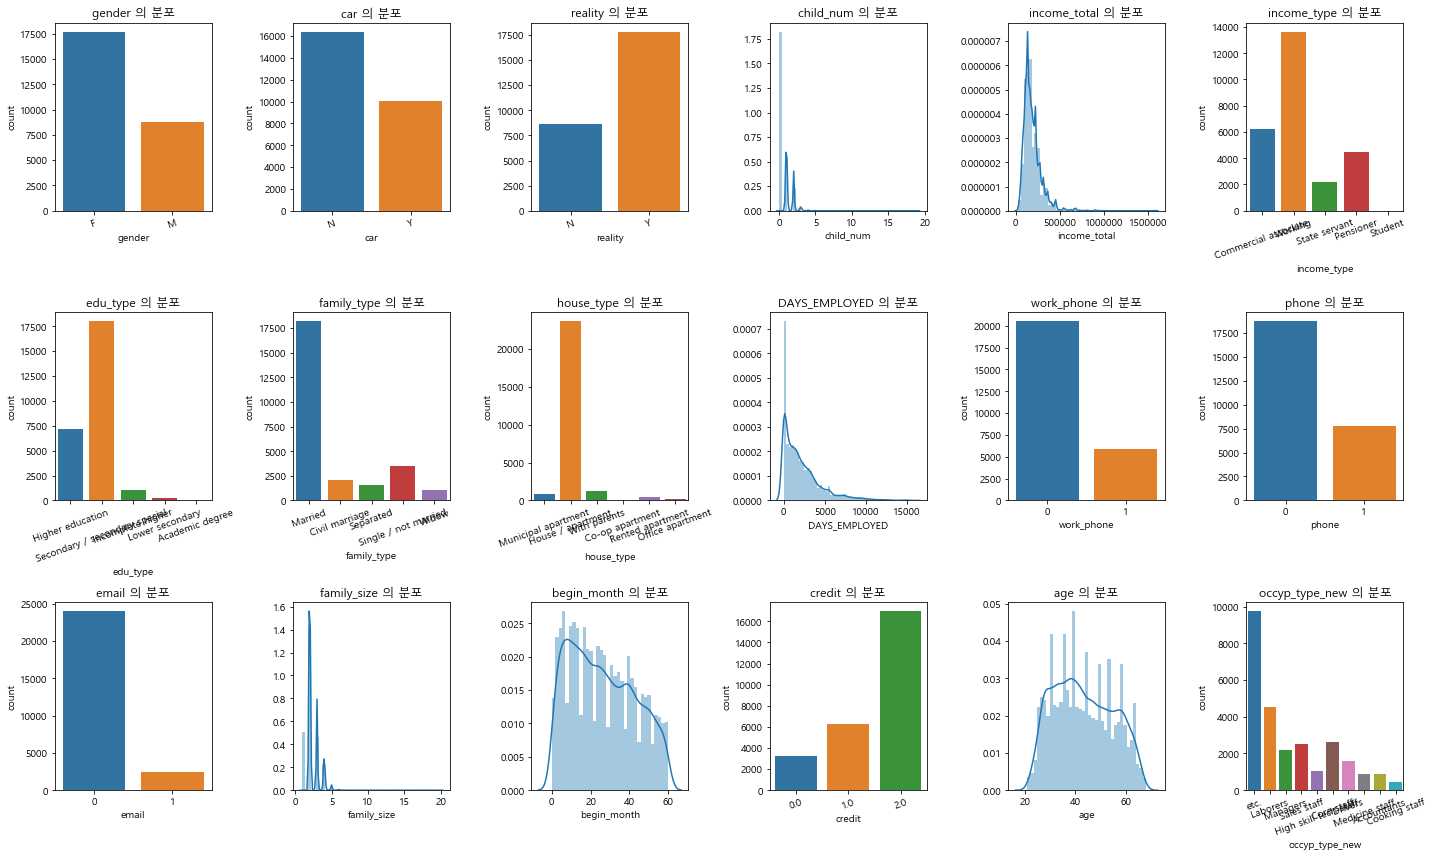

In [138]:
plt.figure(figsize = (20,12))

for i in range(data.shape[1]):
    tmp = data.iloc[:,i]
    if type(tmp[0]) == str or i in [10,11,12,15]:
        plt.subplot(3,6,i+1)
        sns.countplot(data.iloc[:,i])
        plt.title(f'{data.iloc[:,i].name} 의 분포')
        if not str(tmp[0]).isdigit():
            plt.xticks(rotation = 20)
        plt.tight_layout()
    else:
        plt.subplot(3,6,i+1)
        sns.distplot(data.iloc[:,i])
        plt.title(f'{data.iloc[:,i].name} 의 분포')
        plt.tight_layout()
plt.tight_layout()
plt.show()

#### 분포를 봐서 특이한 변수들 찾아내기

- 1. child_num
    - 오른쪽 끝에 극단값들이 몇몇 있는거 같다
    - family_size도 마찬가지

Text(0.5, 1.0, 'income_total 의 분포')

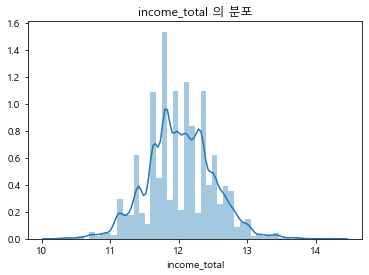

In [134]:
sns.distplot(np.log(data.iloc[:,4]))
plt.title(f'{data.iloc[:,4].name} 의 분포')

In [185]:
data[data.child_num == 19]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,age,occyp_type_new
10731,F,N,Y,19,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,1853,1,1,0,20.0,5.0,2.0,30,etc.


* 실제로 있는 데이터라고 간주는 해야하나? vs 이상치라고 판단하고 제거해야하나?

- 2. DAYS_EMPLOYED
    - 분명 음수를 양수로 바꿔주는 작업을 했는데, 여전히 음수인 데이터들이 있다.(처음부터 양수였던 것들)
    - 데이터 설명에는 고용되지 않은 상태라고 했음
    - 새로운 변수를 만들어야 하나?

In [186]:
min(data.DAYS_EMPLOYED)

-1

In [187]:
data[data.DAYS_EMPLOYED < 0]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,age,occyp_type_new
14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-1,0,1,0,1.0,41.0,2.0,62,etc.
18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-1,0,0,0,2.0,37.0,2.0,63,etc.
21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-1,0,1,0,2.0,7.0,2.0,58,etc.
24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-1,0,1,0,1.0,5.0,2.0,61,etc.
46,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-1,0,1,0,1.0,24.0,2.0,57,etc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26431,F,N,Y,0,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-1,0,0,1,1.0,60.0,1.0,57,etc.
26432,F,Y,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-1,0,1,0,2.0,17.0,1.0,61,etc.
26439,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-1,0,0,0,2.0,57.0,2.0,52,etc.
26441,F,N,Y,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,-1,0,0,0,1.0,43.0,2.0,66,etc.


In [96]:
data[data.DAYS_EMPLOYED < 0].DAYS_EMPLOYED.value_counts()

-365243    4438
Name: DAYS_EMPLOYED, dtype: int64

- 각기 다른 사람이 (같은 사람의 데이터도 있지만) 모두 -365243이라는 값을 가짐

In [188]:
# 고용되지 않은 사람
data[data.DAYS_EMPLOYED < 0].credit.value_counts()

2.0    2818
1.0    1084
0.0     536
Name: credit, dtype: int64

In [189]:
# 고용된 사람
data[data.DAYS_EMPLOYED > 0].credit.value_counts()

2.0    14150
1.0     5183
0.0     2686
Name: credit, dtype: int64

- 1 : 2 : 6 의 비율

#### 성별간 신용도 차이가 있나 고려
- 카이제곱 검정 할까 말까 고민중

In [16]:
data.gender.value_counts()

F    17697
M     8760
Name: gender, dtype: int64

In [17]:
data[data['gender'] == 'F'].credit.value_counts()

2.0    11329
1.0     4220
0.0     2148
Name: credit, dtype: int64

In [18]:
data[data['gender'] == 'M'].credit.value_counts()

2.0    5639
1.0    2047
0.0    1074
Name: credit, dtype: int64

In [131]:
data[data['email'] == 0].credit.value_counts()

2.0    15365
1.0     5724
0.0     2953
Name: credit, dtype: int64

In [132]:
data[data['email'] == 1].credit.value_counts()

2.0    1603
1.0     543
0.0     269
Name: credit, dtype: int64

### 연속형(이산) 변수 변경 ###
1. child_num - 0,1,2,3+ 의 범주형 변수로 바꾸기 (순서형)
2. family_num - drop
3. income_total - log변환
4. DAYS_EMPLOYED - 년차로 변환 (무직 : 0, 1년 미만 : 1) + 년,월,주 등으로 변환하여 한번에
5. begin_month - 년,월,주 등으로 변환하여 한번에
6. age - 20대 : 2, 30대 : 3 의식으로 변환

In [190]:
data.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,age,occyp_type_new
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,4709,0,0,0,2.0,6.0,1.0,38,etc.
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,1540,0,0,1,3.0,5.0,1.0,31,Laborers
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,4434,0,1,0,2.0,22.0,2.0,52,Managers
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,2092,0,1,0,2.0,37.0,0.0,41,Sales staff
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,2105,0,0,0,2.0,26.0,2.0,41,Managers


In [191]:
data = data[['gender', 'age','car', 'reality', 'child_num', 'income_total', 'income_type',
               'edu_type', 'family_type', 'house_type', 'DAYS_EMPLOYED', 'work_phone',
               'phone', 'email','occyp_type_new', 'family_size', 'begin_month', 'credit'
               ]]
data.head(1)

,gender,age,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_EMPLOYED,work_phone,phone,email,occyp_type_new,family_size,begin_month,credit
0,F,38,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,4709,0,0,0,etc.,2.0,6.0,1.0


In [192]:
# 1. child_num - 0,1,2,3+ 의 범주형 변수로 바꾸기 (순서형)
data.loc[data['child_num'] >= 3,'child_num'] = '3+'
data.child_num.value_counts()

0     18340
1      5386
2      2362
3+      369
Name: child_num, dtype: int64

In [145]:
# 2. family_num - drop
# 일단 패스

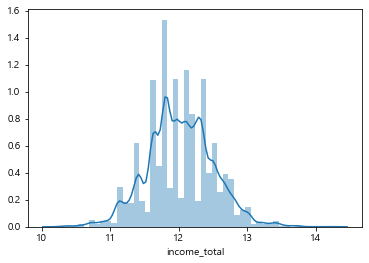

In [193]:
# 3. income_total - log변환
data['income_total'] = np.log(data['income_total'])
sns.distplot(data['income_total']);

In [194]:
# 4. DAYS_EMPLOYED - 년차로 변환 (무직 : 0, 1년 미만 : 1) + 년,월,주 등으로 변환하여 한번에
data['DAYS_EMPLOYED_YEAR'] = data['DAYS_EMPLOYED'] // 365 + 1
data['DAYS_EMPLOYED_MONTH'] = data['DAYS_EMPLOYED'] // 30 + 1
data['DAYS_EMPLOYED_WEEK'] = data['DAYS_EMPLOYED'] // 7 + 1
data.head(1)

,gender,age,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,work_phone,phone,email,occyp_type_new,family_size,begin_month,credit,DAYS_EMPLOYED_YEAR,DAYS_EMPLOYED_MONTH,DAYS_EMPLOYED_WEEK
0,F,38,N,N,0,12.218495,Commercial associate,Higher education,Married,Municipal apartment,...,0,0,0,etc.,2.0,6.0,1.0,13,157,673


In [225]:
# 5. begin_month - 년,월 등으로 변환하여 한번에
data['begin_month'] = data.begin_month.astype('int')
data['begin_year'] = data.begin_month // 12 + 1
data['begin_year'].value_counts()

1    6488
2    6322
3    5377
4    4643
5    3392
6     235
Name: begin_year, dtype: int64

In [209]:
# 6. age - 20대 : 2, 30대 : 3 의식으로 변환
data['age'] = data['age']//10
data['age'] = data['age'].astype('cate')
data['age'].value_counts()

3    7585
4    6769
5    5739
2    3608
6    2756
Name: age, dtype: int64

In [220]:
data.iloc[:,0] = data.iloc[:,0].astype('category')

In [230]:
data.columns

Index(['gender', 'age', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_EMPLOYED',
       'work_phone', 'phone', 'email', 'occyp_type_new', 'family_size',
       'begin_month', 'credit', 'DAYS_EMPLOYED_YEAR', 'DAYS_EMPLOYED_MONTH',
       'DAYS_EMPLOYED_WEEK', 'begin_year'],
      dtype='object')

In [231]:
data = data[['gender', 'age', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_EMPLOYED',
       'DAYS_EMPLOYED_YEAR', 'DAYS_EMPLOYED_MONTH','DAYS_EMPLOYED_WEEK',
       'work_phone', 'phone', 'email', 'occyp_type_new', 'family_size',
       'begin_month', 'begin_year', 'credit']]
data.head(1)

,gender,age,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED_MONTH,DAYS_EMPLOYED_WEEK,work_phone,phone,email,occyp_type_new,family_size,begin_month,begin_year,credit
0,F,3,N,N,0,12.218495,Commercial associate,Higher education,Married,Municipal apartment,...,157,673,0,0,0,etc.,2.0,6,1,1.0


In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               26457 non-null  category
 1   age                  26457 non-null  int64   
 2   car                  26457 non-null  object  
 3   reality              26457 non-null  object  
 4   child_num            26457 non-null  object  
 5   income_total         26457 non-null  float64 
 6   income_type          26457 non-null  object  
 7   edu_type             26457 non-null  object  
 8   family_type          26457 non-null  object  
 9   house_type           26457 non-null  object  
 10  DAYS_EMPLOYED        26457 non-null  int64   
 11  DAYS_EMPLOYED_YEAR   26457 non-null  int64   
 12  DAYS_EMPLOYED_MONTH  26457 non-null  int64   
 13  DAYS_EMPLOYED_WEEK   26457 non-null  int64   
 14  work_phone           26457 non-null  int64   
 15  phone              

In [235]:
data.columns

Index(['gender', 'age', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_EMPLOYED',
       'DAYS_EMPLOYED_YEAR', 'DAYS_EMPLOYED_MONTH', 'DAYS_EMPLOYED_WEEK',
       'work_phone', 'phone', 'email', 'occyp_type_new', 'family_size',
       'begin_month', 'begin_year', 'credit'],
      dtype='object')

In [236]:
data['car'] = data['car'].astype('category')
data['reality'] = data['reality'].astype('category')
data['income_type'] = data['income_type'].astype('category')
data['edu_type'] = data['edu_type'].astype('category')
data['family_type'] = data['family_type'].astype('category')
data['house_type'] = data['house_type'].astype('category')
data['work_phone'] = data['work_phone'].astype('category')
data['phone'] = data['phone'].astype('category')
data['email'] = data['email'].astype('category')
data['occyp_type_new'] = data['occyp_type_new'].astype('category')

In [240]:
data['credit'] = data['credit'].astype('int')
data['credit'] = data['credit'].astype('category')

In [241]:
data.head(1)

,gender,age,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED_MONTH,DAYS_EMPLOYED_WEEK,work_phone,phone,email,occyp_type_new,family_size,begin_month,begin_year,credit
0,F,3,N,N,0,12.218495,Commercial associate,Higher education,Married,Municipal apartment,...,157,673,0,0,0,etc.,2.0,6,1,1


In [243]:
data.to_csv('../data/신용카드/train_ver1.csv', sep = ',', encoding = 'cp949')

In [245]:
pd.read_csv('../data/신용카드/train_ver1.csv',sep =',', encoding = 'cp949', index_col = 0)

,gender,age,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED_MONTH,DAYS_EMPLOYED_WEEK,work_phone,phone,email,occyp_type_new,family_size,begin_month,begin_year,credit
0,F,3,N,N,0,12.218495,Commercial associate,Higher education,Married,Municipal apartment,...,157,673,0,0,0,etc.,2.0,6,1,1
1,F,3,N,Y,1,12.419166,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,52,221,0,0,1,Laborers,3.0,5,1,1
2,M,5,Y,Y,0,13.017003,Working,Higher education,Married,House / apartment,...,148,634,0,1,0,Managers,2.0,22,2,2
3,F,4,N,Y,0,12.218495,Commercial associate,Secondary / secondary special,Married,House / apartment,...,70,299,0,1,0,Sales staff,2.0,37,4,0
4,F,4,Y,Y,0,11.967181,State servant,Higher education,Married,House / apartment,...,71,301,0,0,0,Managers,2.0,26,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,3,N,N,2,12.323856,State servant,Secondary / secondary special,Married,House / apartment,...,67,284,0,0,0,Core staff,4.0,2,1,1
26453,F,4,N,Y,1,12.100712,Working,Higher education,Separated,House / apartment,...,83,354,0,0,0,etc.,2.0,47,4,2
26454,F,2,Y,N,0,12.586220,Working,Secondary / secondary special,Civil marriage,With parents,...,68,288,0,0,0,Core staff,2.0,25,3,2
26455,M,2,N,Y,0,12.049419,Working,Incomplete higher,Single / not married,House / apartment,...,4,16,0,0,0,Laborers,1.0,59,5,2
